In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from OnlineEM_SLAM.data_generation import *
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10,10)
np.random.seed(1234)
from math import atan2

In [17]:
def generate_observations(path, landmarks, w0, R, sigma_0, sigma_1):
    """From a path and a given map of landmarks, generate the observations y_t.
    We assume the robot can see every landmark at every iteration.
    path : array, dimension (n_iter, 2)"""
    observations = np.empty((len(path), len(landmarks), 2), dtype=float)
    for s in range(len(path)):
        for i in range(len(landmarks)):
            diff_pos_landmark = landmarks[i] - path[s, 0:2]
            observations[s, i, 0] = sqrt(np.sum(diff_pos_landmark**2))
            observations[s, i, 1] = atan2(diff_pos_landmark[1], diff_pos_landmark[0]) - path[s, -1]
            # Add noise
            mix_choice = np.random.binomial(1, w0)
            varcov_mat = R * sigma_1 ** 2 if mix_choice else R * sigma_0 ** 2
            delta_s_i = np.random.multivariate_normal([0,0], varcov_mat)
            observations[s, i] += delta_s_i
    return observations

In [18]:
x = np.array([1,1, np.pi/2])
x_1 = f_paper(x, np.array([1, np.pi/2]))

In [30]:
# Instructions débiles
u = np.ones((1000,2))*2
u[0:200,1] = 0
u[20:500, 1] = 0
u[500:1000, 1] = np.pi/100

In [31]:
path = generate_path(u, f_paper, np.diag([0.5**2, np.pi/60]))
landmarks = generate_landmarks(10, map_shape=(50,50))
R = np.array([0.25, 0.01, 0.01, np.pi/60]).reshape(2,2)
obs = generate_observations(path, landmarks, 0.5, R, 1, 5 )


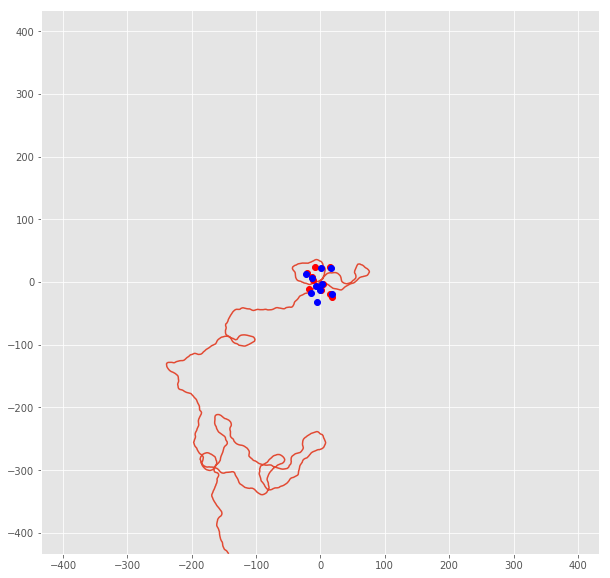

In [32]:
plt.plot(path[: , 0], path[:, 1], landmarks[:, 0], landmarks[:, 1], 'ro')
plt.xlim(-np.abs(path[:, 0:2]).max() - 1 , np.abs(path[:, 0:2]).max() + 1)
plt.ylim(-np.abs(path[:, 0:2]).max() - 1, np.abs(path[:, 0:2]).max() + 1)
obs_pol_coordinates = convert_obs_to_coord(path[0], obs[0])
plt.plot(obs_pol_coordinates[:, 0], obs_pol_coordinates[:, 1], 'bo')
plt.plot()
plt.show()

In [7]:
obs[0]

array([[19.75500207, -1.53321956],
       [22.68277369,  3.06568469],
       [30.96364879,  2.6597445 ],
       [15.59534982,  2.24103036],
       [24.59111174, -1.11455565],
       [ 9.21341582,  1.26786889],
       [18.97008155,  2.2963083 ],
       [ 6.93024685,  1.063769  ],
       [11.04066692,  1.01497484],
       [22.79750187,  3.7922967 ]])

In [12]:
landmarks - convert_obs_to_coord(path[0], obs[0])

array([[-2.04191283e+01,  9.59900586e+00],
       [ 5.37055276e-01,  4.34609289e+00],
       [ 3.57215061e+00,  3.40363176e+00],
       [ 4.21434498e-03,  7.17465948e-01],
       [-7.67050858e+00, -1.01597837e+00],
       [ 5.27330337e-01, -8.50229517e-01],
       [-3.24968118e+00,  6.77912695e-01],
       [ 2.25317730e+00, -3.27569604e+00],
       [ 6.49065336e-01, -6.96814923e-02],
       [ 5.15813068e+00,  2.82059018e+01]])

In [19]:
convert_obs_to_coord(path[0], obs[0])

array([[-19.6769739 , -10.14205069],
       [-22.0804005 ,   6.06624301],
       [-23.86597619,  17.75273431],
       [ -9.68313986,  12.93917224],
       [  3.16375551, -23.09179089],
       [  3.2758362 ,   7.94367443],
       [-15.83668253,  14.8705654 ],
       [  5.61837147,   2.78266922],
       [  6.47457723,   9.30900377],
       [-12.98087312,  14.3963894 ]])

In [72]:
def convert_obs_to_coord(pos, observation):
    """Convert a batch of observations to coordinates given a position."""
    absolute_angle = pos[-1] + observation[:, 1]
    distance = observation[:, 0]
    landmark_pos = np.empty_like(observation)
    landmark_pos[:, 0] = pos[0] + distance * np.cos(absolute_angle)
    landmark_pos[:, 1] = pos[1] + distance * np.sin(absolute_angle)
    return landmark_pos

In [46]:
a = landmarks[0]
atan(a[1]/a[0])

0.47591318712963154

In [7]:
from sympy import *
x1, x2, x3, t1, t2 = symbols("x1 x2 x3 t1 t2")
init_printing()

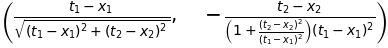

In [9]:
diff(expr1, t1), diff(expr2, t1)

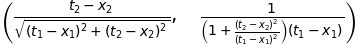

In [10]:
diff(expr1, t2), diff(expr2, t2)

In [14]:
from sympy.utilities.lambdify import lambdify

In [34]:
f = lambdify((x1, x2,t1, t2), diff(expr1, t1), dummify=False)

In [1]:
import numpy as np

In [20]:
m = np.arange(8).reshape(4,2)

In [23]:
choice = np.random.choice(np.arange(4), size=2)
choice

array([3, 2])

In [26]:
m[choice, -1]

(2,)

In [21]:
res = []
Q = np.diag([0.5, np.pi/60]) ** 2
for i in range(10000):
    noisy_controls = np.random.multivariate_normal(np.array([1, 0]), Q)
    res.append(f_paper(np.array([0, 0, 0]), noisy_controls))
    
res = np.array(res)

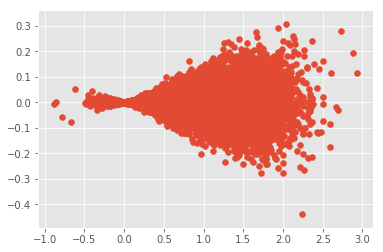

In [28]:
plt.scatter(res[:, 0], res[:, 1])

In [51]:
a.sum(axis=0)

array([2, 4])

In [47]:
np.array([1, 2]).

array([1, 2])

In [49]:
2 ** np.array([1, 2])

array([2, 4])

In [2]:
f = lambda x: x[0] + x[1]

In [5]:
g = -1 * f

TypeError: unsupported operand type(s) for *: 'int' and 'function'

In [14]:
np.random.binomial(1, 0.5)

In [12]:
import numpy as np

In [19]:
np.random.multivariate_normal(np.array([0, 0]), np.arange(1, 5).reshape(2,2))

/home/loic/envs/classicML/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


array([-1.51333807, -1.87025075])